### Bibliotecas que serão utilizadas

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import os
import sys

# Obtém o diretório atual de trabalho
current_dir = os.getcwd()

# Volta duas pastas até chegar ao diretório 'models'
function_path = os.path.join(current_dir, '..', '..', 'models')
sys.path.append(function_path)

import functions as func

### Lendo os dados

In [15]:
abt_00_train = pd.read_csv('../../databases/abt/abt_train.csv')
abt_00_train.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00_train.shape

(90916, 24)

In [16]:
abt_00_test = pd.read_csv('../../databases/abt/abt_test.csv')
abt_00_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00_test.shape

(38964, 24)

In [17]:
abt_00_train.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus,Type of Travel_Personal Travel,Gender_Male,Customer Type_Infrequent Flyer,target
0,-1.087026,-0.617847,-0.549668,1.274518,-0.539639,0.018829,-1.656388,-0.930654,-1.852131,-1.766331,...,0.303105,-1.738216,-0.254779,0.076030,1.109634,-0.280921,1.495256,1.015922,-0.472778,1
1,0.301040,-1.035017,1.710558,-1.345585,-1.254077,-1.545218,1.347794,0.551221,1.178276,1.227377,...,1.152425,-0.217153,-0.385789,-0.392238,-0.901198,3.559716,-0.668782,-0.984328,-0.472778,0
2,2.151795,-0.494501,-1.303076,-0.690559,-0.539639,-0.763194,0.596749,0.551221,-0.336928,-1.766331,...,-2.244857,-0.217153,0.007240,-0.002015,-0.901198,3.559716,-0.668782,-0.984328,-0.472778,1
3,-0.624337,2.282289,0.203741,1.274518,1.603673,1.582876,-0.154297,-0.930654,-0.336928,-0.269477,...,0.303105,-0.217153,-0.280981,-0.158104,-0.901198,-0.280921,-0.668782,-0.984328,-0.472778,1
4,-2.012404,-0.321014,0.957149,0.619492,0.174798,0.800852,0.596749,-0.189717,0.420674,0.478950,...,-0.546216,0.543379,0.033442,-0.028030,1.109634,-0.280921,1.495256,-0.984328,-0.472778,1


In [18]:
abt_00_test.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus,Type of Travel_Personal Travel,Gender_Male,Customer Type_Infrequent Flyer,target
0,1.292516,-0.391211,0.957149,-0.035534,0.174798,0.018829,0.596749,0.551221,0.420674,0.478950,...,0.303105,0.543379,-0.228577,-0.158104,1.109634,-0.280921,-0.668782,1.015922,-0.472778,0
1,-0.624337,-0.516563,-1.303076,-1.345585,-1.254077,0.800852,-0.154297,-1.671592,-0.336928,-0.269477,...,1.152425,-0.217153,-0.385789,-0.392238,-0.901198,-0.280921,-0.668782,1.015922,2.115159,1
2,0.433237,-1.086161,-2.056485,0.619492,-1.968514,0.800852,-1.656388,1.292158,1.178276,-0.269477,...,-0.546216,-0.977684,-0.385789,-0.392238,-0.901198,-0.280921,-0.668782,-0.984328,-0.472778,0
3,0.036647,2.318390,-2.056485,-1.345585,-1.254077,0.800852,1.347794,1.292158,1.178276,0.478950,...,0.303105,0.543379,0.374068,0.440238,-0.901198,-0.280921,-0.668782,1.015922,-0.472778,0
4,-0.227747,1.512129,-0.549668,-0.690559,0.889236,-0.763194,-0.905342,-0.189717,0.420674,-1.017904,...,-1.395537,-0.977684,-0.333385,-0.392238,-0.901198,-0.280921,-0.668782,-0.984328,-0.472778,1


### Treinamento do modelo para seleção de variáveis

In [20]:
X = abt_00_train.drop(axis=1,columns='target')
y = abt_00_train.target

# Treinar modelo com algoritmo Random Forest 
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  18


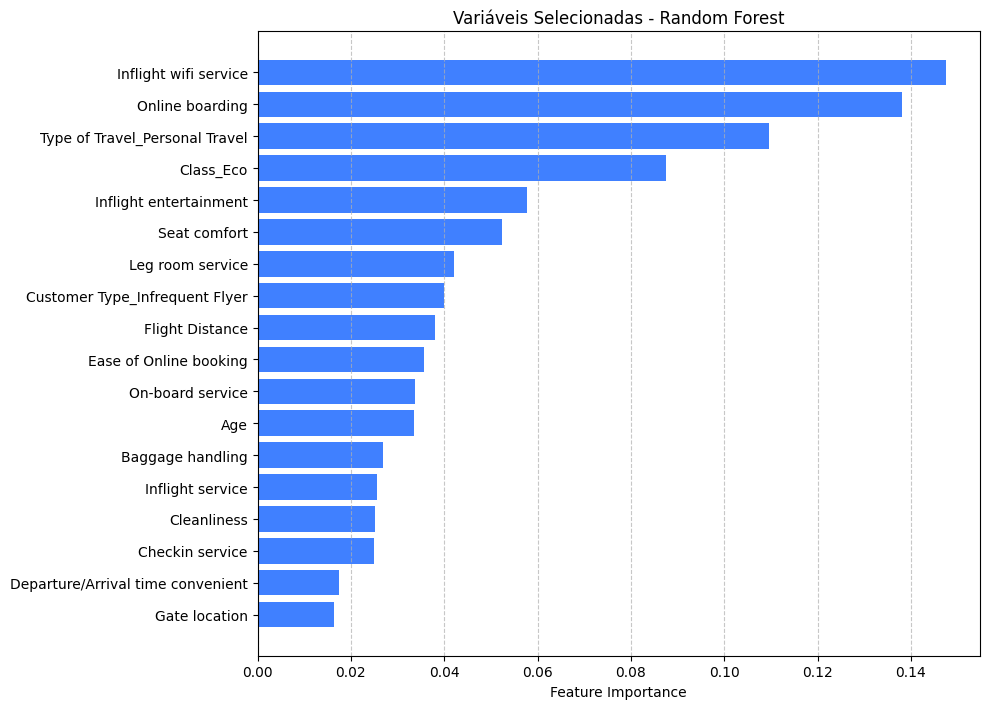

In [21]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.1

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('../../artifacts/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [23]:
# Carregar a lista do arquivo .pkl
with open('../../artifacts/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Class_Eco', 'Type of Travel_Personal Travel', 'Customer Type_Infrequent Flyer']


In [25]:
# Incluindo a variável target na lista de variáveis explicativas selecionadas.
lista_features = loaded_lista + ['target']

abt_treino_01 = abt_00_train[lista_features]
abt_teste_01 = abt_00_test[lista_features]

abt_treino_01.shape, abt_teste_01.shape,

((90916, 19), (38964, 19))

In [26]:
abt_treino_01.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Eco,Type of Travel_Personal Travel,Customer Type_Infrequent Flyer,target
0,-1.087026,-0.617847,-0.549668,1.274518,-0.539639,0.018829,-0.930654,-1.852131,-1.766331,-0.299289,-0.268441,1.159630,0.547016,0.303105,-1.738216,1.109634,1.495256,-0.472778,1
1,0.301040,-1.035017,1.710558,-1.345585,-1.254077,-1.545218,0.551221,1.178276,1.227377,1.256156,1.250311,1.159630,1.335571,1.152425,-0.217153,-0.901198,-0.668782,-0.472778,0
2,2.151795,-0.494501,-1.303076,-0.690559,-0.539639,-0.763194,0.551221,-0.336928,-1.766331,-1.854734,-1.787193,-2.234022,-1.030092,-2.244857,-0.217153,-0.901198,-0.668782,-0.472778,1
3,-0.624337,2.282289,0.203741,1.274518,1.603673,1.582876,-0.930654,-0.336928,-0.269477,-1.854734,-1.787193,-0.537196,-0.241538,0.303105,-0.217153,-0.901198,-0.668782,-0.472778,1
4,-2.012404,-0.321014,0.957149,0.619492,0.174798,0.800852,-0.189717,0.420674,0.478950,-1.077012,1.250311,-0.537196,0.547016,-0.546216,0.543379,1.109634,1.495256,-0.472778,1


In [28]:
abt_teste_01.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Eco,Type of Travel_Personal Travel,Customer Type_Infrequent Flyer,target
0,1.292516,-0.391211,0.957149,-0.035534,0.174798,0.018829,0.551221,0.420674,0.478950,-1.854734,0.490935,0.311217,-1.030092,0.303105,0.543379,1.109634,-0.668782,-0.472778,0
1,-0.624337,-0.516563,-1.303076,-1.345585,-1.254077,0.800852,-1.671592,-0.336928,-0.269477,1.256156,-1.027817,1.159630,-0.241538,1.152425,-0.217153,-0.901198,-0.668782,2.115159,1
2,0.433237,-1.086161,-2.056485,0.619492,-1.968514,0.800852,1.292158,1.178276,-0.269477,-0.299289,-0.268441,-0.537196,-1.818646,-0.546216,-0.977684,-0.901198,-0.668782,-0.472778,0
3,0.036647,2.318390,-2.056485,-1.345585,-1.254077,0.800852,1.292158,1.178276,0.478950,0.478433,0.490935,0.311217,-0.241538,0.303105,0.543379,-0.901198,-0.668782,-0.472778,0
4,-0.227747,1.512129,-0.549668,-0.690559,0.889236,-0.763194,-0.189717,0.420674,-1.017904,-1.077012,-1.027817,-1.385609,-1.030092,-1.395537,-0.977684,-0.901198,-0.668782,-0.472778,1


### Mapa de correlação de Pearson (multicolinearidade)

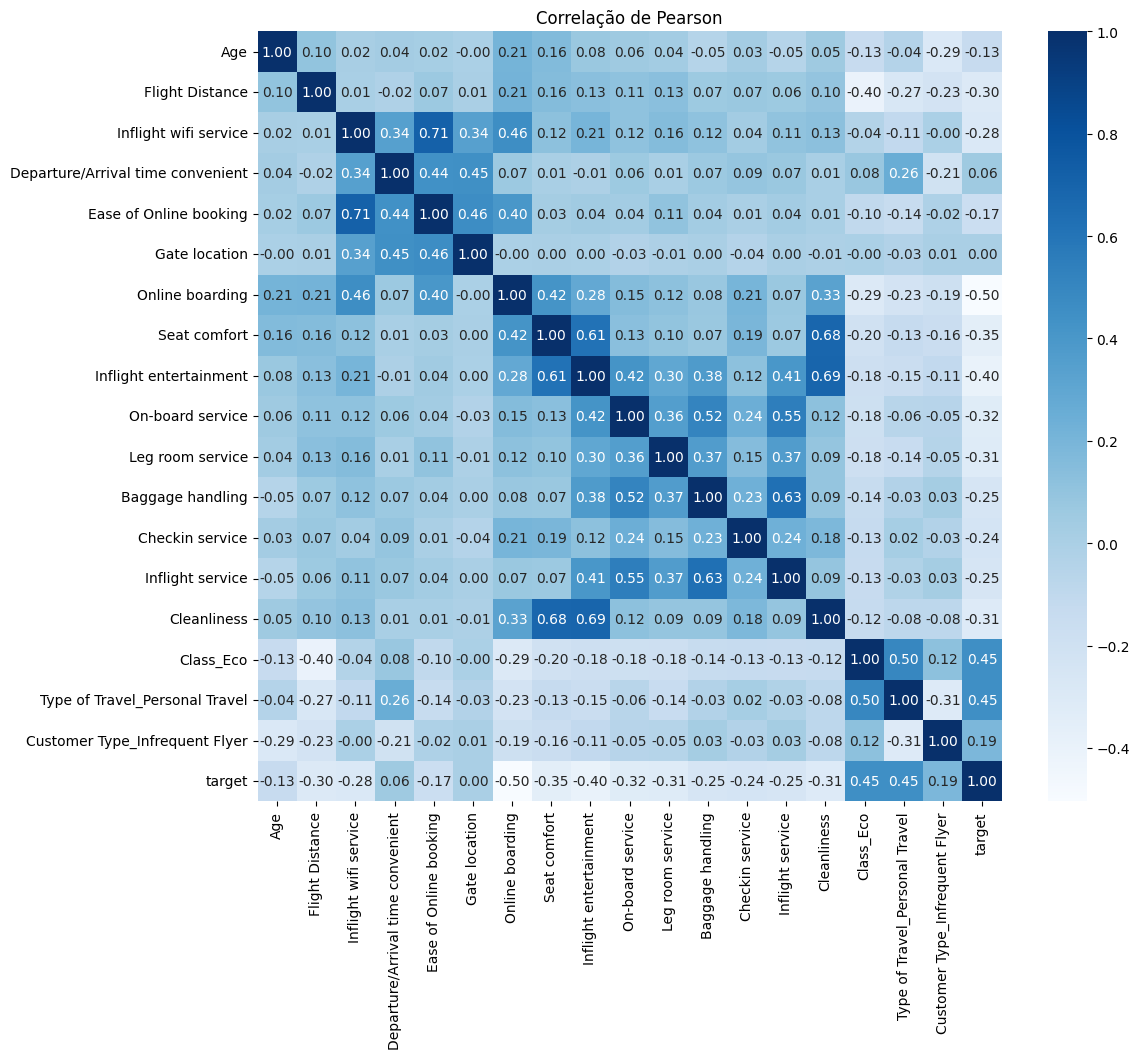

In [29]:
# Calculando a correlação de Pearson.
corr_matrix = abt_treino_01.corr()

# Plotando o heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlação de Pearson')
plt.show()

#### Como não tem nenhuma variável altamente correlacionada com outra (limiar 0.9), vou deixar o codigo abaixo comentado.

In [31]:
'''

# Definindo limiar de correlação.
limiar_corr = 0.90

# Criando uma lista com pares de variáveis com correlação absoluta >= o limiar.
corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])
              for i in range(len(corr_matrix.columns))
              for j in range(i + 1, len(corr_matrix.columns))
              if abs(corr_matrix.iloc[i, j]) >= limiar_corr]

# Encontrando as variáveis com menor IV em cada par e adicionando à lista vars_to_drop_corr.
vars_to_drop_corr = []
for var1, var2 in corr_pairs:
    iv_values = iv_df.set_index('Variável').loc[[var1, var2], 'IV']
    var_to_drop = iv_values.idxmin()
    vars_to_drop_corr.append(var_to_drop)

# Removendo duplicatas da lista vars_to_drop_corr.
vars_to_drop_corr = list(set(vars_to_drop_corr))

print('Lista de variáveis para remover devido à alta correlação:', vars_to_drop_corr)

'''

"\n\n# Definindo limiar de correlação.\nlimiar_corr = 0.90\n\n# Criando uma lista com pares de variáveis com correlação absoluta >= o limiar.\ncorr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])\n              for i in range(len(corr_matrix.columns))\n              for j in range(i + 1, len(corr_matrix.columns))\n              if abs(corr_matrix.iloc[i, j]) >= limiar_corr]\n\n# Encontrando as variáveis com menor IV em cada par e adicionando à lista vars_to_drop_corr.\nvars_to_drop_corr = []\nfor var1, var2 in corr_pairs:\n    iv_values = iv_df.set_index('Variável').loc[[var1, var2], 'IV']\n    var_to_drop = iv_values.idxmin()\n    vars_to_drop_corr.append(var_to_drop)\n\n# Removendo duplicatas da lista vars_to_drop_corr.\nvars_to_drop_corr = list(set(vars_to_drop_corr))\n\nprint('Lista de variáveis para remover devido à alta correlação:', vars_to_drop_corr)\n\n"

In [32]:

'''

# Removendo as variáveis com alta correlação.
abt_treino_02 = abt_treino_01.drop(abt_treino_01[vars_to_drop_corr], axis=1)

abt_treino_02.shape

'''

'\n\n# Removendo as variáveis com alta correlação.\nabt_treino_02 = abt_treino_01.drop(abt_treino_01[vars_to_drop_corr], axis=1)\n\nabt_treino_02.shape\n\n'

In [33]:
'''

# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).
with open('../../artifacts/prd_vars_to_drop_corr.pkl', 'wb') as f:
    pickle.dump(vars_to_drop_corr, f)

'''

"\n\n# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).\nwith open('../../artifacts/prd_vars_to_drop_corr.pkl', 'wb') as f:\n    pickle.dump(vars_to_drop_corr, f)\n\n"

In [34]:
'''

# Carregando o pkl com a lista de variáveis a serem removidas.
with open('../../artifacts/prd_vars_to_drop_corr.pkl', 'rb') as f:
    loaded_vars_to_drop_corr = pickle.load(f)

# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_02 = abt_teste_01.drop(axis=1, columns=loaded_vars_to_drop_corr)

abt_teste_02.shape

'''

"\n\n# Carregando o pkl com a lista de variáveis a serem removidas.\nwith open('../../artifacts/prd_vars_to_drop_corr.pkl', 'rb') as f:\n    loaded_vars_to_drop_corr = pickle.load(f)\n\n# Aplicando a remoção das variáveis na tabela de teste.\nabt_teste_02 = abt_teste_01.drop(axis=1, columns=loaded_vars_to_drop_corr)\n\nabt_teste_02.shape\n\n"

### Avaliar a força de discriminação das variáveis explicativas frente ao target (IV)

In [35]:
# Fazendo uma amostra dos dados para processamento mais rápido.
abt_treino_01_sample = abt_treino_01.sample(n=10000)


In [36]:
# Chamando a função.
iv_df = func.iv_table(abt_treino_01, 'target')
iv_df

,Variável,IV,Preditividade
2,Inflight wifi service,2.036508,Preditor Forte
6,Online boarding,1.951165,Preditor Forte
1,Flight Distance,1.537914,Preditor Forte
16,Type of Travel_Personal Travel,1.062033,Preditor Forte
15,Class_Eco,0.904859,Preditor Forte
8,Inflight entertainment,0.806267,Preditor Forte
7,Seat comfort,0.665604,Preditor Forte
10,Leg room service,0.499360,Preditor Forte
9,On-board service,0.481049,Preditor Forte
14,Cleanliness,0.449957,Preditor Forte


### Removendo variáveis com poder preditivo fraco e inútil

In [39]:
# Criando uma lista vazia para armazenar os nomes das colunas com preditividade "Preditor Fraco" e "Inútil para a predição".
vars_to_drop_iv = []

# Criando uma lista com os critérios que queremos filtrar.
status_predit = ['Preditor Fraco', 'Inútil para a predição']

# Itera sobre as linhas do DataFrame iv_df.
for index, row in iv_df.iterrows():
    # Verifica se a preditividade está dentro dos critérios que queremos filtrar.
    if row['Preditividade'] in status_predit:
        # Adicionar o nome da coluna à lista vars_to_drop_iv.
        vars_to_drop_iv.append(row['Variável'])


print('Lista de variáveis para remover devido ao baixo valor de IV:', vars_to_drop_iv)


Lista de variáveis para remover devido ao baixo valor de IV: ['Gate location', 'Departure/Arrival time convenient']


In [40]:
# Removendo as variáveis com alta correlação.
abt_treino_02 = abt_treino_01.drop(abt_treino_01[vars_to_drop_iv], axis=1)

abt_treino_02.shape

(90916, 17)

In [41]:
abt_treino_02.head(5)

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Eco,Type of Travel_Personal Travel,Customer Type_Infrequent Flyer,target
0,-1.087026,-0.617847,-0.549668,-0.539639,-0.930654,-1.852131,-1.766331,-0.299289,-0.268441,1.159630,0.547016,0.303105,-1.738216,1.109634,1.495256,-0.472778,1
1,0.301040,-1.035017,1.710558,-1.254077,0.551221,1.178276,1.227377,1.256156,1.250311,1.159630,1.335571,1.152425,-0.217153,-0.901198,-0.668782,-0.472778,0
2,2.151795,-0.494501,-1.303076,-0.539639,0.551221,-0.336928,-1.766331,-1.854734,-1.787193,-2.234022,-1.030092,-2.244857,-0.217153,-0.901198,-0.668782,-0.472778,1
3,-0.624337,2.282289,0.203741,1.603673,-0.930654,-0.336928,-0.269477,-1.854734,-1.787193,-0.537196,-0.241538,0.303105,-0.217153,-0.901198,-0.668782,-0.472778,1
4,-2.012404,-0.321014,0.957149,0.174798,-0.189717,0.420674,0.478950,-1.077012,1.250311,-0.537196,0.547016,-0.546216,0.543379,1.109634,1.495256,-0.472778,1


In [42]:
# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).
with open('../../artifacts/prd_vars_to_drop_iv.pkl', 'wb') as f:
    pickle.dump(vars_to_drop_iv, f)

In [43]:
# Carregando o pkl com a lista de variáveis a serem removidas.
with open('../../artifacts/prd_vars_to_drop_iv.pkl', 'rb') as f:
    loaded_vars_to_drop_iv = pickle.load(f)

In [44]:
# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_02 = abt_teste_01.drop(axis=1, columns=loaded_vars_to_drop_iv)

abt_teste_02.shape

(38964, 17)

In [45]:
abt_teste_02.head(5)

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Eco,Type of Travel_Personal Travel,Customer Type_Infrequent Flyer,target
0,1.292516,-0.391211,0.957149,0.174798,0.551221,0.420674,0.478950,-1.854734,0.490935,0.311217,-1.030092,0.303105,0.543379,1.109634,-0.668782,-0.472778,0
1,-0.624337,-0.516563,-1.303076,-1.254077,-1.671592,-0.336928,-0.269477,1.256156,-1.027817,1.159630,-0.241538,1.152425,-0.217153,-0.901198,-0.668782,2.115159,1
2,0.433237,-1.086161,-2.056485,-1.968514,1.292158,1.178276,-0.269477,-0.299289,-0.268441,-0.537196,-1.818646,-0.546216,-0.977684,-0.901198,-0.668782,-0.472778,0
3,0.036647,2.318390,-2.056485,-1.254077,1.292158,1.178276,0.478950,0.478433,0.490935,0.311217,-0.241538,0.303105,0.543379,-0.901198,-0.668782,-0.472778,0
4,-0.227747,1.512129,-0.549668,0.889236,-0.189717,0.420674,-1.017904,-1.077012,-1.027817,-1.385609,-1.030092,-1.395537,-0.977684,-0.901198,-0.668782,-0.472778,1


### Salvando ABT`s de treino e teste pós Feature Selection

In [47]:
abt_treino_02.to_csv('../../databases/abt/abt_treino_fs01.csv')
abt_teste_02.to_csv('../../databases/abt/abt_teste_fs01.csv')